In [1]:
# The packages used are shown below

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import sklearn
sklearn.__version__

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
import math
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.svm import SVR

In [9]:
df = pd.read_csv("data_scaled.csv", delimiter = ',')
df.head(5)

,TaxiOuttimeMinutes,DelayCarrierMinutes,DelayWeatherMinutes,DelayNationalAviationSystemMinutes,DelaySecurityMinutes,DelayLateAircraftArrivalMinutes,city,time,maxtempC,mintempC,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,TailNumber,DestinationAirport,DeparturedelayMinutes
0,-0.696706,-0.133200,-0.052276,-0.214549,-0.013172,-0.175610,-0.879167,-0.018254,0.494536,0.822523,...,0.261324,-0.259572,0.214704,0.820179,0.371536,0.541785,0.333371,N66831,IAD,0
1,-0.599715,0.186753,-0.052276,-0.113895,-0.013172,1.329416,-0.879167,-0.018254,0.494536,0.822523,...,0.261324,-0.259572,0.214704,0.820179,0.371536,0.541785,0.333371,N521NK,ATL,1
2,-0.793697,-0.133200,-0.052276,-0.214549,-0.013172,-0.175610,-0.879167,-0.018254,0.494536,0.822523,...,0.261324,-0.259572,0.214704,0.820179,0.371536,0.541785,0.333371,N971DL,ATL,0
3,-0.987679,-0.133200,-0.052276,-0.214549,-0.013172,-0.175610,-0.879167,1.168270,0.494536,0.822523,...,1.414447,-0.259572,0.379231,0.394988,0.371536,1.656321,1.079486,N75436,IAD,1
4,-0.502724,-0.133200,-0.052276,-0.214549,-0.013172,-0.175610,-0.879167,1.168270,0.494536,0.822523,...,1.414447,-0.259572,0.379231,0.394988,0.371536,1.656321,1.079486,N803AW,LAX,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279266 entries, 0 to 1279265
Data columns (total 30 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   TaxiOuttimeMinutes                  1279266 non-null  float64
 1   DelayCarrierMinutes                 1279266 non-null  float64
 2   DelayWeatherMinutes                 1279266 non-null  float64
 3   DelayNationalAviationSystemMinutes  1279266 non-null  float64
 4   DelaySecurityMinutes                1279266 non-null  float64
 5   DelayLateAircraftArrivalMinutes     1279266 non-null  float64
 6   city                                1279266 non-null  float64
 7   time                                1279266 non-null  float64
 8   maxtempC                            1279266 non-null  float64
 9   mintempC                            1279266 non-null  float64
 10  totalSnow_cm                        1279266 non-null  float64
 11  sunHour    

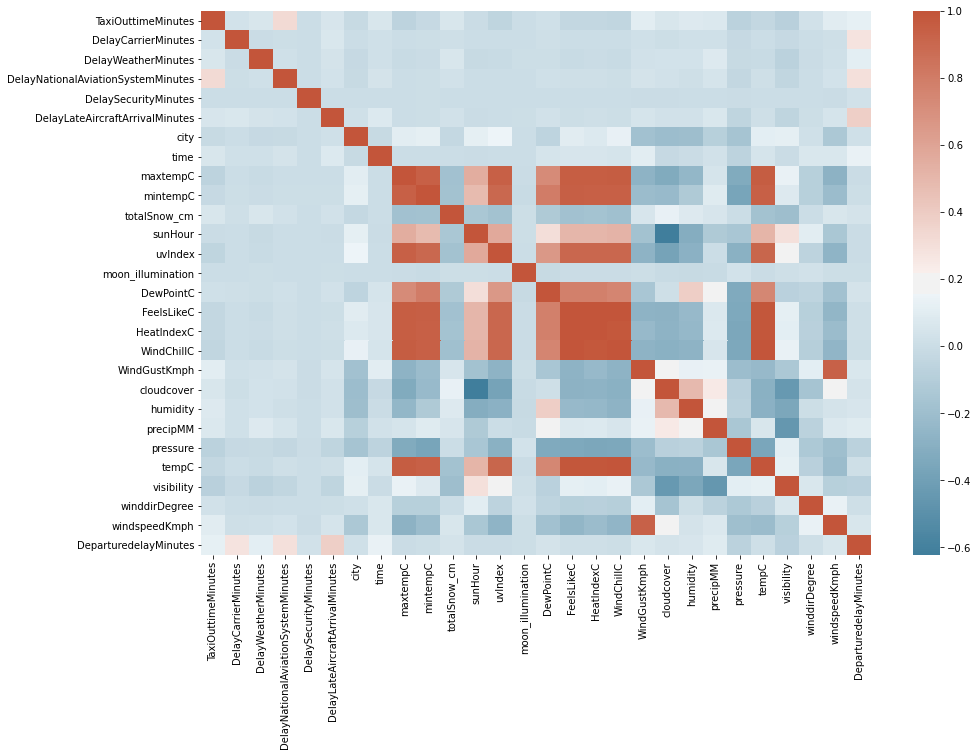

In [4]:
corrplot = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrplot, cmap = sns.diverging_palette(230, 20, as_cmap=True))

In [3]:
df.shape

(1279266, 30)

In [10]:
df.drop(['time', 'DelayWeatherMinutes'], axis=1, inplace=True)

In [11]:
target = df["DeparturedelayMinutes"]
TailNumber = df["TailNumber"]
DestinationAirport = df["DestinationAirport"]
data = df.drop(["DeparturedelayMinutes", "TailNumber", "DestinationAirport"], axis = 1)
data.shape

(1279266, 25)

In [12]:
target.value_counts()

0    1058726
1     220540
Name: DeparturedelayMinutes, dtype: int64

In [13]:

X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.30, random_state=55000)


In [6]:
"""
The function classification_models fit the model with the best parameters. Calculates the model accuracy score 
on both training and validation sets. Displays the confusion matrix and computes the classification report to 
measure the performance of the model on the validation set.

The functions RandomForest_Hypermarameter, SVC_Hypermarameter, Decision_Tree_model_hp, AdaBoost_model_hp identifies
the best parameters and calls the classification_models to compute the statistics. 


"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn import naive_bayes
from sklearn import metrics
from sklearn.svm import SVC

def classification_models(X_train, y_train, X_val, y_val, hp = False, RandomForest = False, SVC_RBF = False, SVC_linear = False, SVC_polynomial = False, DT = False, AdaBoost = False):
  """
Returns the model accuracy on train and validation data. Plots the confusion matrix and print classification reprt.
      
      Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set
                  hp (boolean): Set true to fit model with best parameters
                  RandomForest: Set true to fit the RandomForest model
                  SVC_RBF:  Set true to fit the RBF kernel SVC model
                  SVC_linear: Set true to fit the Linear kernel SVC model
                  SVC_polynomial: Set true to fit the Polynomial kernel SVC model
                  DT: Set true to fit the Decision tree model
                  AdaBoost: Set true to fit the AdaBoost model
  """
  if(hp == False):
    if (RandomForest == True):
      model = RandomForestClassifier()    # Fit default RandomForest model
      model.fit(X_train, y_train)
    elif (SVC_RBF == True):
      model = SVC(kernel ='rbf')          # Fit default RBF kernel SVC model
      model.fit(X_train, y_train)
    elif (SVC_linear == True):
      model = SVC(kernel ='linear')       # Fit default Linear kernel SVC model
      model.fit(X_train, y_train)
    elif (SVC_polynomial == True):
      model = SVC(kernel ='poly')         # Fit default Polynomial kernel SVC model
      model.fit(X_train, y_train)
    elif (DT == True):
      model = DecisionTreeClassifier()    # Fit default Decision tree model
      model.fit(X_train, y_train)
    elif (AdaBoost == True):              # Fit default AdaBoost model
      model = AdaBoostClassifier()
      model.fit(X_train, y_train)

  else:
    if (RandomForest == True):
      max_depth_input = int(input('Enter max_depth: '))
      min_samples_split_input = int(input('Enter min_samples_split: '))
      
      # Fit the RandomForest model with best parameters
      model = RandomForestClassifier(max_depth = max_depth_input, min_samples_split = min_samples_split_input)
      model.fit(X_train, y_train)   
    elif (DT == True):
      max_depth_input = int(input('Enter max_depth: '))
      min_samples_split_input = int(input('Enter min_samples_split: '))

      # Fit the RandomForest model with best parameters
      model = DecisionTreeClassifier(max_depth = max_depth_input, min_samples_split = min_samples_split_input)
      model.fit(X_train, y_train)
    elif (AdaBoost == True):
      learning_rate_input = float(input('Enter Optimal learning rate: '))

      # Fit the AdaBoost classifier with optimal learning rate
      model = AdaBoostClassifier(n_estimators=100, learning_rate=learning_rate_input)
      model.fit(X_train, y_train)
    else:
      C_input = int(input('Enter optimal C value: '))
      # Fit the SVC kernels with optimal C value
      if (SVC_RBF == True):
        model = SVC(kernel ='rbf', C = C_input)
        model.fit(X_train, y_train)
      elif (SVC_linear == True):
        model = SVC(kernel ='linear', C = C_input)
        model.fit(X_train, y_train)
      elif (SVC_polynomial == True):
        model = SVC(kernel ='poly', C = C_input)
        model.fit(X_train, y_train)


  model_pred_train = model.predict(X_train)  # Predict and calculate accuracy on train data
  print('Accuracy score of train data: ', metrics.accuracy_score(y_true = y_train, y_pred = model_pred_train))
  print('\n')

  model_pred_test = model.predict(X_val)    # Predict and calculate accuracy on validation data
  print('Accuracy score of test data: ', metrics.accuracy_score(y_true = y_val, y_pred = model_pred_test))
  print('-------------------------------------------------------------------------------------------------------------------')

  #Confusion matrix
  confusion_matrix =  pd.crosstab(index=y_val, columns=model_pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
  sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
  print(confusion_matrix)
  plt.title("Confusion Matrix for test data", fontsize = 15)
  plt.show()

  # Print classification report
  print('Classification report of default Random forest model: ')
  print(metrics.classification_report(y_val, model_pred_test))



def RandomForest_Hypermarameter(X_train, y_train, X_val, y_val):
  """
  Computes the optimal max_depth and min_samples_split and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set
  """
  RF_hp = RandomForestClassifier()
  parameters = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [8,10,12,14,16,20]
  }
  GSC = GridSearchCV(RF_hp, parameters, scoring = 'precision', n_jobs = -1)
  GSC.fit(X_train, y_train)
  print('Best parameters of RandomForest model: ', GSC.best_params_)
  classification_models(X_train, y_train, X_val, y_val, hp = True, RandomForest = True)


def SVC_Hypermarameter(X_train, y_train, X_val, y_val, RBF = False, linear = False, polynomial = False):
  """
  Computes the optimal C value and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set
                  RBF (Boolean): Set to True to perform hyperparameter tuning on RBF kernel SVC model
                  linear (Boolean): Set to True to perform hyperparameter tuning on linear kernel SVC model
                  polynomial (Boolean): Set to True to perform hyperparameter tuning on polynomial kernel SVC model

  """
  selected = input('Select one of the three SVC models (RBF, Linear and Polynomial): ')
  print('Selected SVC_{} model for hyperparameter tuning'.format(selected))
  print('\n')
  if (RBF == True):
    svc = SVC(kernel ='rbf')
  elif (linear == True):
    svc = SVC(kernel ='linear')
  elif (polynomial == True):
    svc = SVC(kernel ='poly')
  parameters = {
    'C': [0.01, 0.1, 5]
  }
  GSC = GridSearchCV(svc, parameters, scoring = 'precision', n_jobs = -1)
  GSC.fit(X_train, y_train)
  print('Best parameters for SVC_{}: {}'.format(selected, GSC.best_params_))
  
  if (RBF == True):
    classification_models(X_train, y_train, X_val, y_val, hp = True, SVC_RBF = True)
  elif (linear == True):
    classification_models(X_train, y_train, X_val, y_val, hp = True, SVC_linear = True)
  else:
    classification_models(X_train, y_train, X_val, y_val, hp = True, SVC_polynomial = True)


def Decision_Tree_model_hp(X_train, y_train, X_val, y_val):
  """
  Computes the optimal max_depth and min_samples_split and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

  """
  DT_hp = DecisionTreeClassifier()
  parameters = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [8,10,12,14,16,20]
  }
  GSC = GridSearchCV(DT_hp, parameters, scoring = 'precision', n_jobs = -1)
  GSC.fit(X_train, y_train)
  print('Best parameters of Decision Trees model: ', GSC.best_params_)
  classification_models(X_train, y_train, X_val, y_val, hp = True, DT = True)


def AdaBoost_model_hp(X_train, y_train, X_val, y_val):
  """
  Computes the optimal learning rate and call classification_models function to perform validation
  
        Parameters:
                  X_train (DataFrame): Train data excluding target variable (Shares)
                  y_train (DataFrame): Target variable (Shares) of training set
                  X_val (DataFrame): Validation data excluding target variable (Shares)
                  y_val (DataFrame): Target variable (Shares) of validation set

  """
  AB_hp = AdaBoostClassifier()
  parameters = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1]
}
  GSC = GridSearchCV(AB_hp, parameters, scoring = 'precision', n_jobs = -1)
  GSC.fit(X_train, y_train)
  print('Best parameters of AdaBoost model: ', GSC.best_params_)
  classification_models(X_train, y_train, X_val, y_val, hp = True, AdaBoost = True)

Accuracy score of train data:  0.9941037604161316


Accuracy score of test data:  0.9372583250820783
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          310133   7534
1           16545  49568


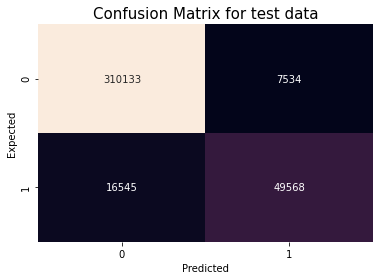

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    317667
           1       0.87      0.75      0.80     66113

    accuracy                           0.94    383780
   macro avg       0.91      0.86      0.88    383780
weighted avg       0.94      0.94      0.94    383780



In [8]:
# Random forest without hyperparameter tuning
classification_models(X_train, y_train, X_val, y_val, hp = False, RandomForest = True)

Best parameters of RandomForest model:  {'max_depth': 10, 'min_samples_split': 14}
Enter max_depth: 10
Enter min_samples_split: 14
Accuracy score of train data:  0.9494006606468443


Accuracy score of test data:  0.9493095002345093
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          316474   1193
1           18261  47852


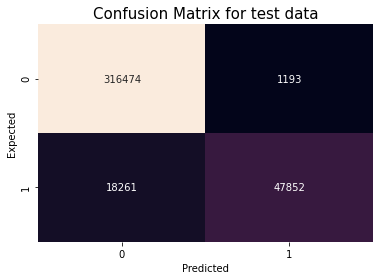

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    317667
           1       0.98      0.72      0.83     66113

    accuracy                           0.95    383780
   macro avg       0.96      0.86      0.90    383780
weighted avg       0.95      0.95      0.95    383780



In [9]:
# Random Forest classifier with hyperparameter tuning
RandomForest_Hypermarameter(X_train, y_train, X_val, y_val)


Accuracy score of train data:  0.9941495456098699


Accuracy score of test data:  0.9107118661733284
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          299516  18151
1           16116  49997


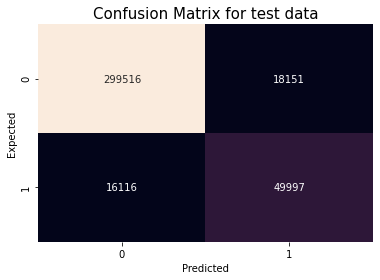

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    317667
           1       0.73      0.76      0.74     66113

    accuracy                           0.91    383780
   macro avg       0.84      0.85      0.85    383780
weighted avg       0.91      0.91      0.91    383780



In [28]:
# Decision tree model without hyperparameter tuning
classification_models(X_train, y_train, X_val, y_val, hp = False, DT = True)

Best parameters of Decision Trees model:  {'max_depth': 8, 'min_samples_split': 14}
Enter max_depth: 8
Enter min_samples_split: 14
Accuracy score of train data:  0.949525732395593


Accuracy score of test data:  0.9498071811975611
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          316344   1323
1           17940  48173


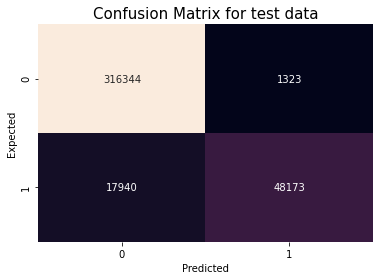

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    317667
           1       0.97      0.73      0.83     66113

    accuracy                           0.95    383780
   macro avg       0.96      0.86      0.90    383780
weighted avg       0.95      0.95      0.95    383780



In [86]:
# Decision tree model with hyperparameter tuning
Decision_Tree_model_hp(X_train, y_train, X_val, y_val)

Accuracy score of train data:  0.9463844214203238


Accuracy score of test data:  0.9469148991609776
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          315584   2083
1           18290  47823


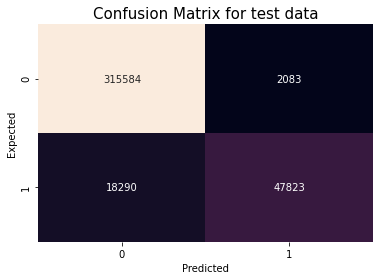

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    317667
           1       0.96      0.72      0.82     66113

    accuracy                           0.95    383780
   macro avg       0.95      0.86      0.90    383780
weighted avg       0.95      0.95      0.94    383780



In [29]:
# AdaBoost model without hyperparameter tuning
classification_models(X_train, y_train, X_val, y_val, hp = False, AdaBoost = True)


Best parameters of AdaBoost model:  {'learning_rate': 0.1}
Enter Optimal learning rate: 0.1
Accuracy score of train data:  0.9437467475761765


Accuracy score of test data:  0.9441893793319089
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          315661   2006
1           19413  46700


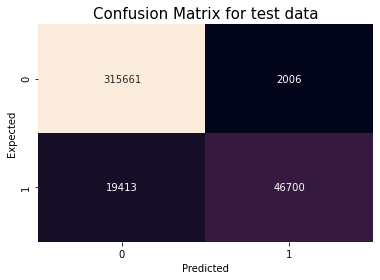

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    317667
           1       0.96      0.71      0.81     66113

    accuracy                           0.94    383780
   macro avg       0.95      0.85      0.89    383780
weighted avg       0.94      0.94      0.94    383780



In [30]:
# AdaBoost model with hyperparameter tuning
AdaBoost_model_hp(X_train, y_train, X_val, y_val)

In [27]:
# Performing Backward Elimination

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()  # Fitting ordinary least square regression
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:  # Checking condition for p-value
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    BE_summary = regressor_OLS.summary()
    return x, columns, BE_summary  # Returning modeled data and the significant columns


def Summary_Selection_Methods(train, target, cutoff, train_columns):
    Data_BE, selected_columns, BE_summary = backwardElimination(train.values, target.values, cutoff, train_columns.columns)
    
    print("The variables selected by backwardElimination are: ")
    for i in selected_columns:
        print(i)
    print("---------------------------------------------------------------------------------------------------------------")
    print("Summary of Backward Elimination: ")
    print(BE_summary)
    
    return Data_BE, selected_columns

In [29]:
Data_BE, selected_columns = Summary_Selection_Methods(X_train, y_train, 0.05, X_train)

The variables selected by backwardElimination are: 
TaxiOuttimeMinutes
DelayCarrierMinutes
DelayWeatherMinutes
DelayNationalAviationSystemMinutes
DelaySecurityMinutes
DelayLateAircraftArrivalMinutes
city
time
maxtempC
mintempC
totalSnow_cm
sunHour
moon_illumination
DewPointC
FeelsLikeC
HeatIndexC
WindChillC
WindGustKmph
cloudcover
humidity
precipMM
pressure
tempC
visibility
windspeedKmph
---------------------------------------------------------------------------------------------------------------
Summary of Backward Elimination: 
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.259
Model:                            OLS   Adj. R-squared (uncentered):              0.259
Method:                 Least Squares   F-statistic:                          1.253e+04
Date:                Mon, 24 May 2021   Prob (F-statistic):                        0.00
Time:                  

In [31]:
# Creating data frame with only the important columns

X_train_BE = X_train[selected_columns]
X_val_BE = X_val[selected_columns]

Accuracy score of train data:  0.9941495456098699


Accuracy score of test data:  0.9107379227682526
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          299513  18154
1           16103  50010


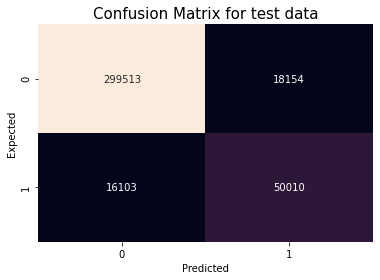

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    317667
           1       0.73      0.76      0.74     66113

    accuracy                           0.91    383780
   macro avg       0.84      0.85      0.85    383780
weighted avg       0.91      0.91      0.91    383780



In [32]:
# Decision tree model without hyperparameter tuning
classification_models(X_train_BE, y_train, X_val_BE, y_val, hp = False, DT = True)

Best parameters of Decision Trees model:  {'max_depth': 8, 'min_samples_split': 14}
Enter max_depth: 8
Enter min_samples_split: 14
Accuracy score of train data:  0.9495212655474234


Accuracy score of test data:  0.9498045755380687
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          316354   1313
1           17951  48162


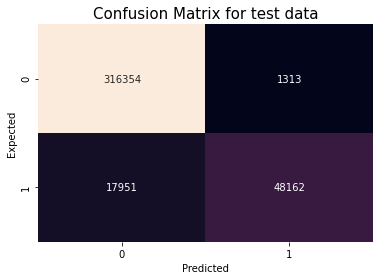

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    317667
           1       0.97      0.73      0.83     66113

    accuracy                           0.95    383780
   macro avg       0.96      0.86      0.90    383780
weighted avg       0.95      0.95      0.95    383780



In [38]:
# Decision tree model with hyperparameter tuning
Decision_Tree_model_hp(X_train_BE, y_train, X_val_BE, y_val)

Accuracy score of train data:  0.9463844214203238


Accuracy score of test data:  0.9469148991609776
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          315584   2083
1           18290  47823


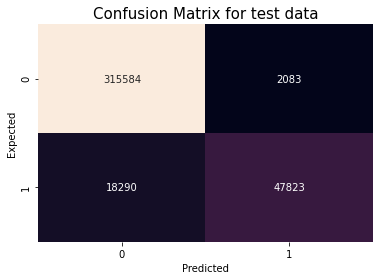

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    317667
           1       0.96      0.72      0.82     66113

    accuracy                           0.95    383780
   macro avg       0.95      0.86      0.90    383780
weighted avg       0.95      0.95      0.94    383780



In [34]:
# AdaBoost model without hyperparameter tuning
classification_models(X_train_BE, y_train, X_val_BE, y_val, hp = False, AdaBoost = True)

Best parameters of AdaBoost model:  {'learning_rate': 0.1}
Enter Optimal learning rate: 0.1
Accuracy score of train data:  0.9437467475761765


Accuracy score of test data:  0.9441893793319089
-------------------------------------------------------------------------------------------------------------------
Predicted       0      1
Expected                
0          315661   2006
1           19413  46700


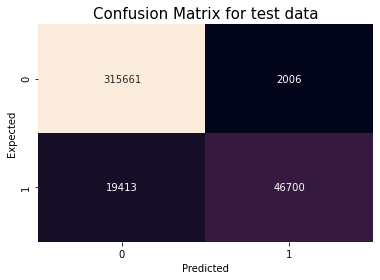

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    317667
           1       0.96      0.71      0.81     66113

    accuracy                           0.94    383780
   macro avg       0.95      0.85      0.89    383780
weighted avg       0.94      0.94      0.94    383780



In [35]:
# AdaBoost model with hyperparameter tuning
AdaBoost_model_hp(X_train_BE, y_train, X_val_BE, y_val)

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 14)
sfs1 = sfs(clf,
           k_features=25,
           forward=True,
           floating=False,
           verbose=2,
           scoring='precision',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   32.6s finished

[2021-05-24 12:31:04] Features: 1/25 -- score: 0.8925376831779737[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   40.7s finished

[2021-05-24 12:31:45] Features: 2/25 -- score: 0.9291736550558818[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   48.2s finished

[2021-05-24 12:32:33] Features: 3/25 -- score: 0.9429695157449738[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [85]:
sfs1

SequentialFeatureSelector(estimator=DecisionTreeClassifier(max_depth=8,
                                                           min_samples_split=14),
                          k_features=25, scoring='accuracy', verbose=2)

In [53]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26]


In [63]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf2 = DecisionTreeClassifier(max_depth = 8, min_samples_split = 14)
sfs2 = sfs(clf2,
           k_features=6,
           forward=True,
           floating=False,
           verbose=2,
           scoring='precision',
           cv=5)

# Perform SFFS
sfs2 = sfs2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision 

In [64]:
feat_cols2 = list(sfs2.k_feature_idx_)
print(feat_cols2)

[1, 2, 4, 5, 6, 12]


In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895486 entries, 692088 to 767556
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   TaxiOuttimeMinutes                  895486 non-null  float64
 1   DelayCarrierMinutes                 895486 non-null  float64
 2   DelayWeatherMinutes                 895486 non-null  float64
 3   DelayNationalAviationSystemMinutes  895486 non-null  float64
 4   DelaySecurityMinutes                895486 non-null  float64
 5   DelayLateAircraftArrivalMinutes     895486 non-null  float64
 6   city                                895486 non-null  float64
 7   time                                895486 non-null  float64
 8   maxtempC                            895486 non-null  float64
 9   mintempC                            895486 non-null  float64
 10  totalSnow_cm                        895486 non-null  float64
 11  sunHour              

Predicted       0      1
Expected                
0          316344   1323
1           17939  48174


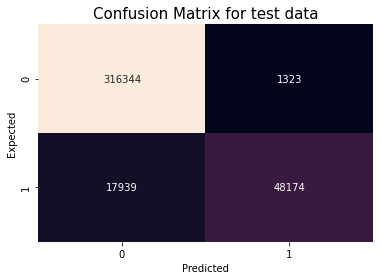

In [72]:
# Build full model with selected features
clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 14)
clf.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train.iloc[:, feat_cols])
#print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_val.iloc[:, feat_cols])
#print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

confusion_matrix =  pd.crosstab(index=y_val, columns=y_test_pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
print(confusion_matrix)
plt.title("Confusion Matrix for test data", fontsize = 15)
plt.show()

In [73]:
print('Classification report of default Random forest model: ')
print(metrics.classification_report(y_val, y_test_pred))

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    317667
           1       0.97      0.73      0.83     66113

    accuracy                           0.95    383780
   macro avg       0.96      0.86      0.90    383780
weighted avg       0.95      0.95      0.95    383780



Predicted       0      1
Expected                
0          317089    578
1           24351  41762


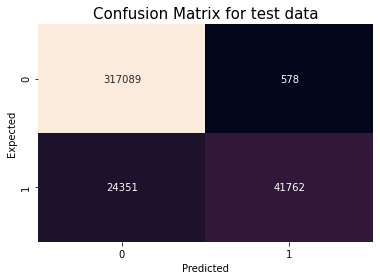

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    317667
           1       0.99      0.63      0.77     66113

    accuracy                           0.94    383780
   macro avg       0.96      0.81      0.87    383780
weighted avg       0.94      0.94      0.93    383780



In [74]:
# Build full model with selected features
clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 14)
clf.fit(X_train.iloc[:, feat_cols2], y_train)

y_train_pred = clf.predict(X_train.iloc[:, feat_cols2])
#print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_val.iloc[:, feat_cols2])
#print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

confusion_matrix =  pd.crosstab(index=y_val, columns=y_test_pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
print(confusion_matrix)
plt.title("Confusion Matrix for test data", fontsize = 15)
plt.show()

print('Classification report of default Random forest model: ')
print(metrics.classification_report(y_val, y_test_pred))

In [75]:
pca = PCA(n_components=None)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_val)

In [82]:
X_train_pca = X_train_pca[:, 0:10]
X_test_pca = X_test_pca[:, 0:10]

Best parameters of Decision Trees model:  {'max_depth': 2, 'min_samples_split': 8}
Enter max_depth: 2
Enter min_samples_split: 8
Accuracy score of train data:  0.8409243695602164


Accuracy score of test data:  0.841469070821825
-------------------------------------------------------------------------------------------------------------------
Predicted       0     1
Expected               
0          316036  1631
1           59210  6903


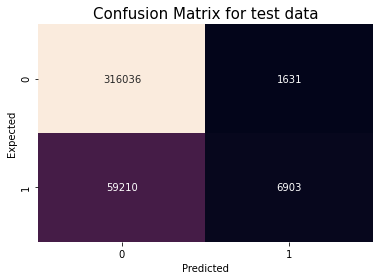

Classification report of default Random forest model: 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91    317667
           1       0.81      0.10      0.18     66113

    accuracy                           0.84    383780
   macro avg       0.83      0.55      0.55    383780
weighted avg       0.84      0.84      0.79    383780



In [83]:
# Decision tree model with hyperparameter tuning
Decision_Tree_model_hp(X_train_pca, y_train, X_test_pca, y_val)

Feature: 0, Score: 0.01588
Feature: 1, Score: 0.30610
Feature: 2, Score: 0.04178
Feature: 3, Score: 0.14087
Feature: 4, Score: 0.00160
Feature: 5, Score: 0.49064
Feature: 6, Score: 0.00021
Feature: 7, Score: 0.00270
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00005
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00001
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00002
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00007
Feature: 26, Score: 0.00000


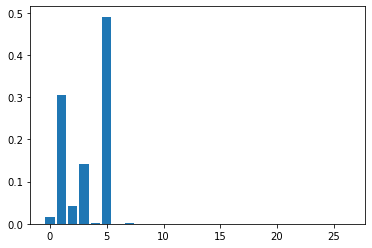

In [89]:
model = DecisionTreeClassifier(max_depth = 8, min_samples_split = 14)
model.fit(X_train, y_train)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.36307
Feature: 1, Score: 0.05139
Feature: 2, Score: 0.00188
Feature: 3, Score: 0.58267
Feature: 4, Score: 0.00078
Feature: 5, Score: 0.00022


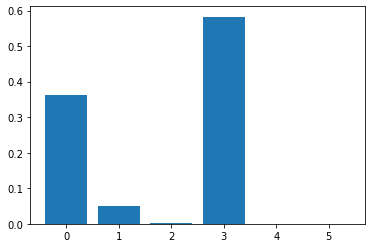

In [91]:
model = DecisionTreeClassifier(max_depth = 8, min_samples_split = 14)
model.fit(X_train.iloc[:, feat_cols2], y_train)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [92]:
X_train.iloc[:, feat_cols2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895486 entries, 692088 to 767556
Data columns (total 6 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   DelayCarrierMinutes              895486 non-null  float64
 1   DelayWeatherMinutes              895486 non-null  float64
 2   DelaySecurityMinutes             895486 non-null  float64
 3   DelayLateAircraftArrivalMinutes  895486 non-null  float64
 4   city                             895486 non-null  float64
 5   uvIndex                          895486 non-null  float64
dtypes: float64(6)
memory usage: 47.8 MB


In [14]:
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=15, max_depth = 4, min_samples_split = 14)
rnd_clf.fit(X_train, y_train)
for name, importance in zip(X_train.columns, rnd_clf.feature_importances_):
    print(name, "=", importance)

TaxiOuttimeMinutes = 0.012431399306003931
DelayCarrierMinutes = 0.3670416862732651
DelayNationalAviationSystemMinutes = 0.18623629064229108
DelaySecurityMinutes = 0.0005630113578362519
DelayLateAircraftArrivalMinutes = 0.41780790353633074
city = 0.0004956552459389008
maxtempC = 0.00033754762025880195
mintempC = 0.00031275415709042806
totalSnow_cm = 0.0003344316090640406
sunHour = 0.00028816630915833974
uvIndex = 1.0124443819701108e-05
moon_illumination = 8.402415467273175e-06
DewPointC = 0.0011851041215692948
FeelsLikeC = 0.00025572921713217406
HeatIndexC = 0.00021822289980639838
WindChillC = 0.00028178337060834075
WindGustKmph = 0.00037071875278694375
cloudcover = 5.9844132336578604e-05
humidity = 0.0005046761794749768
precipMM = 0.005504119505140221
pressure = 0.001709767502453547
tempC = 0.00013114202004602885
visibility = 0.0035871982980635445
winddirDegree = 1.3238587025940689e-05
windspeedKmph = 0.00031108249703133977


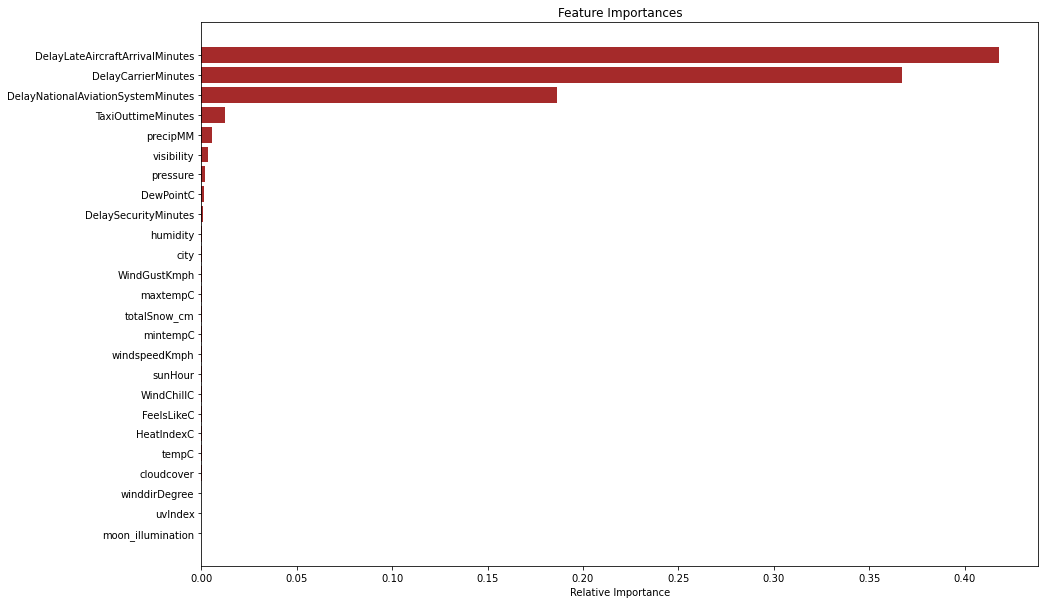

In [16]:
features = X_train.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='brown', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()